<a href="https://colab.research.google.com/github/teja-1403/PRODIGY_ML_02/blob/main/PRODIGY_ML_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PRODIGY_ML_02**

# K-Means Clustering to group customers of a retail store

In [32]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import plotly.express as px

In [33]:
# Load the dataset
file_path = "/content/Mall_Customers.csv"
df = pd.read_csv(file_path)

In [34]:
# Data Exploration
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [35]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [36]:
print(df.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [37]:
print(df.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [38]:
# No missing values in the dataset
# Encoding Gender as a numerical feature
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

In [39]:
# Selecting features for clustering
features = ['Annual Income (k$)', 'Spending Score (1-100)']
X = df[features]

In [40]:
# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [41]:
# Using the Elbow Method to determine the optimal number of clusters
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

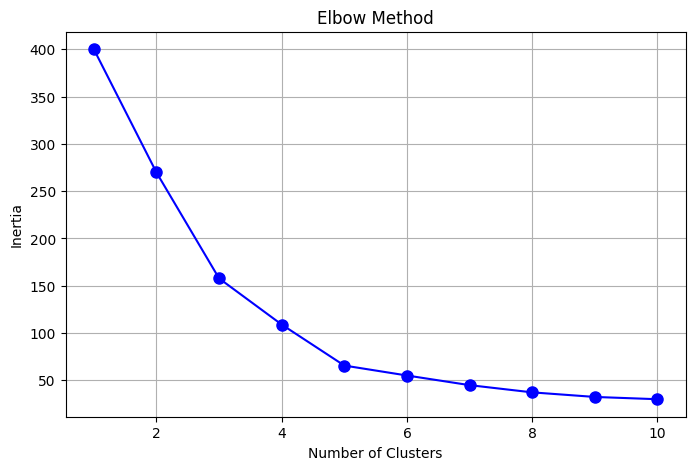

In [42]:
# Plotting the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, 'bo-', markersize=8)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

# Based on the Elbow Method, the optimal number of clusters is 5

In [43]:
# Using Silhouette scores to determine the optimal number of clusters
silhouette_scores = {}
for n_clusters in [2, 3, 4, 5, 6, 7]:
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_scores[n_clusters] = silhouette_score(X_scaled, cluster_labels)

print(f"Silhouette Score for 2 clusters: {silhouette_scores[2]:.3f}")
print(f"Silhouette Score for 3 clusters: {silhouette_scores[3]:.3f}")
print(f"Silhouette Score for 4 clusters: {silhouette_scores[4]:.3f}")
print(f"Silhouette Score for 5 clusters: {silhouette_scores[5]:.3f}")
print(f"Silhouette Score for 6 clusters: {silhouette_scores[6]:.3f}")
print(f"Silhouette Score for 7 clusters: {silhouette_scores[7]:.3f}")
print("\n")

# Determine the optimal number of clusters based on Silhouette Scores
optimal_clusters = max(silhouette_scores, key=silhouette_scores.get)
print(f"Optimal number of clusters based on Silhouette Score: {optimal_clusters}")

Silhouette Score for 2 clusters: 0.321
Silhouette Score for 3 clusters: 0.467
Silhouette Score for 4 clusters: 0.494
Silhouette Score for 5 clusters: 0.555
Silhouette Score for 6 clusters: 0.540
Silhouette Score for 7 clusters: 0.528


Optimal number of clusters based on Silhouette Score: 5


The Silhouette Score was highest for 5 clusters (0.555), indicating that 5 clusters provide the best balance between compactness and separation of clusters.
This score demonstrates that the data is well-separated into distinct groups, and the clusters are relatively dense.

In [44]:
# Apply k-means clustering
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

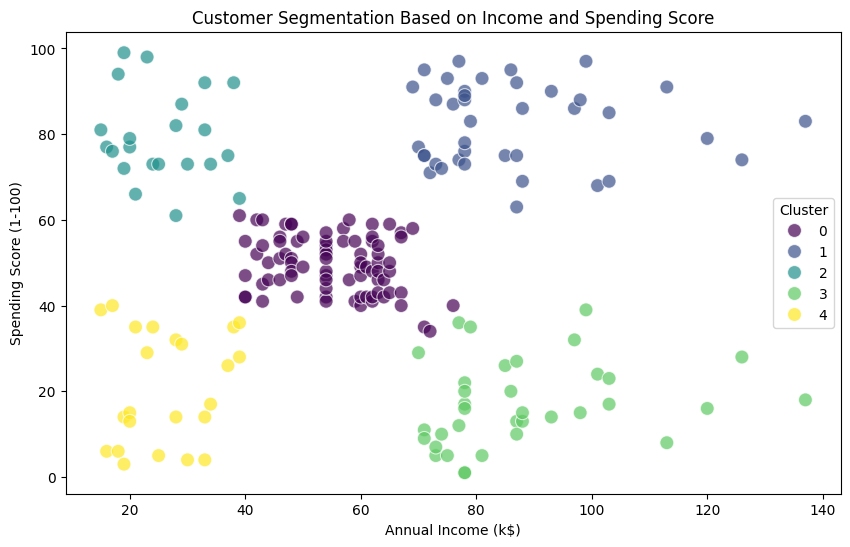

In [45]:
# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Annual Income (k$)', y='Spending Score (1-100)',
    hue='Cluster', data=df, palette='viridis', s=100, alpha=0.7
)
plt.title('Customer Segmentation Based on Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

In [46]:
# 3D Visualization of Clusters
fig = px.scatter_3d(
    df, x='Annual Income (k$)', y='Spending Score (1-100)', z='Age',
    color='Cluster', title='3D Customer Clusters',
    labels={'Cluster': 'Cluster'},
    color_continuous_scale='Viridis'
)
fig.show()

In [47]:
# Analyzing Cluster Properties
print(df.groupby('Cluster').mean())

         CustomerID    Gender        Age  Annual Income (k$)  \
Cluster                                                        
0         86.320988  0.592593  42.716049           55.296296   
1        162.000000  0.538462  32.692308           86.538462   
2         23.090909  0.590909  25.272727           25.727273   
3        164.371429  0.457143  41.114286           88.200000   
4         23.000000  0.608696  45.217391           26.304348   

         Spending Score (1-100)  
Cluster                          
0                     49.518519  
1                     82.128205  
2                     79.363636  
3                     17.114286  
4                     20.913043  


# **Conclusion**

# Cluster Properties Analysis

The mean values of the key attributes for each cluster provide insight into customer segmentation. Here's the interpretation:

### **Cluster 0**
- **Average Income**: $55.3k  
- **Spending Score**: 49.5 (Moderate spending habits)  
- **Age**: 42.7 (Older customers)  
- **Gender Ratio**: Slightly more females (59%).  
- **Insight**: These are mid-income, middle-aged customers with average spending habits. Marketing efforts could focus on increasing spending.

### **Cluster 1**
- **Average Income**: $86.5k  
- **Spending Score**: 82.1 (High spending habits)  
- **Age**: 32.7 (Younger customers)  
- **Gender Ratio**: Balanced (54% female).  
- **Insight**: High-income young customers who are the most valuable for businesses. Target premium products and exclusive deals to maintain loyalty.

### **Cluster 2**
- **Average Income**: $25.7k  
- **Spending Score**: 79.4 (High spending habits despite low income)  
- **Age**: 25.3 (Young customers)  
- **Gender Ratio**: Slightly more females (59%).  
- **Insight**: Younger, low-income customers with high spending. These could be students or new earners, and businesses should offer budget-friendly options while maintaining quality.

### **Cluster 3**
- **Average Income**: $88.2k  
- **Spending Score**: 17.1 (Low spending habits)  
- **Age**: 41.1 (Middle-aged customers)  
- **Gender Ratio**: Slightly more males (54%).  
- **Insight**: High-income customers who spend conservatively. These customers may prefer saving or investing. Marketing efforts could emphasize value-for-money products or investment-related services.

### **Cluster 4**
- **Average Income**: $26.3k  
- **Spending Score**: 20.9 (Low spending habits)  
- **Age**: 45.2 (Older customers)  
- **Gender Ratio**: More females (61%).  
- **Insight**: Low-income older customers who spend less. They may prioritize essential goods or services. Businesses can focus on offering affordable and practical options.

# General Observations

- **Cluster Segmentation**: The segmentation effectively captures different customer groups based on income, spending behavior, age, and gender.  
- **High-Spending Customers**: Clusters 1 and 2 represent high spenders (Cluster 1 has high income, while Cluster 2 has low income). These groups are critical for businesses.  
- **Low-Spending Customers**: Clusters 3 and 4 represent low-spending customers. Different marketing approaches can be used for high-income vs. low-income low spenders.  

# Recommendations for Businesses

### **Cluster 1 (High-income, high spenders):**
- Offer loyalty programs, premium products, and exclusive services.  
- Focus on customer retention.  

### **Cluster 2 (Low-income, high spenders):**
- Provide affordable luxury products or EMI/payment plans to sustain spending behavior.  

### **Cluster 3 (High-income, low spenders):**
- Promote investment-related services or products emphasizing long-term value.  

### **Cluster 4 (Low-income, low spenders):**
- Provide basic and essential goods/services with affordability in mind.  

### **Cluster 0 (Moderate income and spending):**
- Focus on strategies to move them towards higher spending.
